## Dataset
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import chi2_contingency 


In [4]:
df=pd.read_csv("/content/drive/MyDrive/EE_660_Project/bank-additional/bank-additional-full.csv", sep = ';')

In [5]:
df.to_csv('file1.csv')

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Exploratory Data Analysis

In [8]:
def generate_groupwise_probability(data,feature,label):
    d1=pd.crosstab(data[feature], data[label], dropna=False,margins=True)
    d2 = (df.groupby(feature,sort=False)[label].count()/len(df)).round(2)
    d3=pd.crosstab(data[feature], data[label], dropna=False, normalize='index').round(2)
    d=pd.merge(d1, d2,left_index=True, right_index=True)
    d.rename(columns={'All': 'Count_total', 'no': 'Count_no', 'yes': 'Count_yes','y':'Prob_total'}, inplace=True)
    d_final=pd.merge(d, d3, on=feature)
    d_final.rename(columns={'no': 'Prob_no', 'yes': 'Prob_yes'}, inplace=True)
    d_final=d_final[['Count_no', 'Prob_no', 'Count_yes', 'Prob_yes','Count_total', 'Prob_total']]
    return d_final

### Plot 1

In [9]:
grouped_df=df.groupby(['y'])
list(grouped_df.groups)

['no', 'yes']

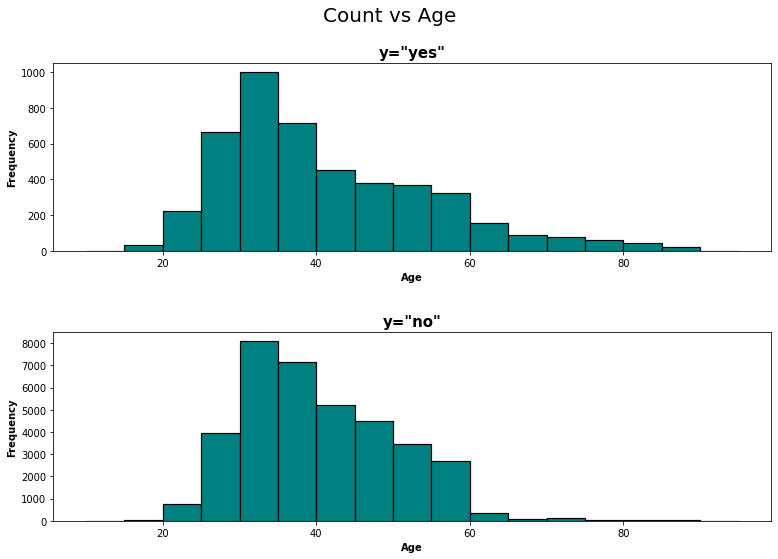

In [10]:
plt.figure(figsize=(12,8))
plt.suptitle('Count vs Age', fontsize=20)
#plot 1:
plt.subplot(2, 1, 1)
plt.hist(grouped_df.get_group('yes')['age'], edgecolor='black', linewidth=1.2,bins=np.arange(10,100,5),color='teal')
plt.title('y="yes"', fontsize=15,fontweight="bold")
plt.xlabel('Age',fontweight="bold")
plt.ylabel('Frequency',fontweight="bold")
plt.tight_layout(pad=5.0)
#plot 2:
plt.subplot(2, 1, 2)
plt.hist(grouped_df.get_group('no')['age'], edgecolor='black', linewidth=1.2,bins=np.arange(10,100,5),color='teal')
plt.title('y="no"', fontsize=15,fontweight="bold")
plt.xlabel('Age',fontweight="bold")
plt.ylabel('Frequency',fontweight="bold")
plt.show()

### Jobs

In [11]:
generate_groupwise_probability(df,'job','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
job,,,,,,
admin.,9070,0.87,1352,0.13,10422,0.25
blue-collar,8616,0.93,638,0.07,9254,0.22
entrepreneur,1332,0.91,124,0.09,1456,0.04
housemaid,954,0.90,106,0.10,1060,0.03
management,2596,0.89,328,0.11,2924,0.07
retired,1286,0.75,434,0.25,1720,0.04
self-employed,1272,0.90,149,0.10,1421,0.03
services,3646,0.92,323,0.08,3969,0.10
student,600,0.69,275,0.31,875,0.02


### Marital

In [12]:
generate_groupwise_probability(df,'marital','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
marital,,,,,,
divorced,4136,0.90,476,0.10,4612,0.11
married,22396,0.90,2532,0.10,24928,0.61
single,9948,0.86,1620,0.14,11568,0.28
unknown,68,0.85,12,0.15,80,0.00


### Education

In [13]:
df_education_yes=df[df['y']=='yes'].groupby('education')['y'].count()
df_education_no=df[df['y']=='no'].groupby('education')['y'].count()

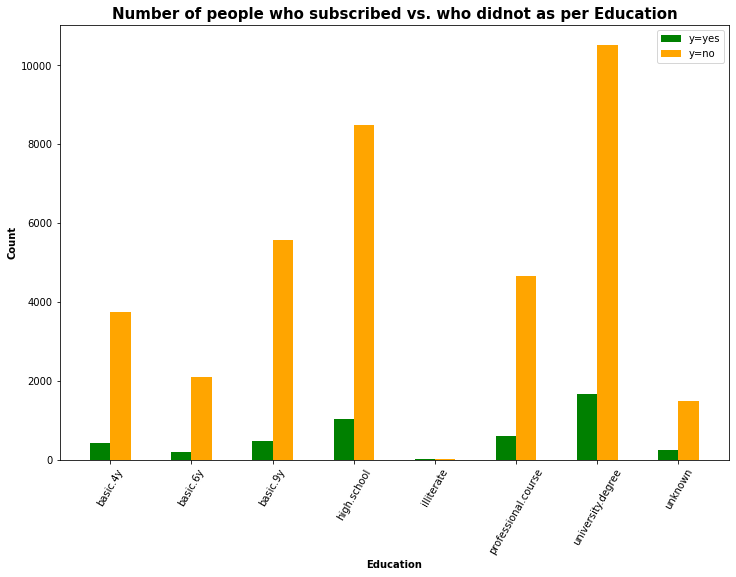

In [14]:
plt.figure(figsize=(12,8))
r = np.arange(8)
width = 0.25
plt.bar(r,df_education_yes, 0.25, color='green', align='center',label='y=yes')
plt.bar(r+width,df_education_no, 0.25, color='orange', align='center',label='y=no')
plt.xlabel("Education",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
plt.title("Number of people who subscribed vs. who didnot as per Education", fontsize=15,fontweight="bold")
plt.xticks(r + width/2,['basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'],rotation=60)
plt.legend()
plt.show()

### Default

In [15]:
generate_groupwise_probability(df,'default','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
default,,,,,,
no,28391,0.87,4197,0.13,32588,0.79
unknown,8154,0.95,443,0.05,8597,0.21
yes,3,1.00,0,0.00,3,0.00


### Loan

In [16]:
generate_groupwise_probability(df,'loan','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
loan,,,,,,
no,30100,0.89,3850,0.11,33950,0.82
unknown,883,0.89,107,0.11,990,0.02
yes,5565,0.89,683,0.11,6248,0.15


In [40]:
# https://www.reneshbedre.com/blog/chi-square-test.html
# https://towardsdatascience.com/chi-square-test-how-to-calculate-chi-square-using-formula-python-implementation-6da203f96569
def chi_func(df,feat,label):
    cross_tab_table=pd.crosstab(df[feat], df[label], margins=True)
    chi2_stat, p, dof, expected =chi2_contingency(cross_tab_table)
    
    print(f"chi2 statistic:     {chi2_stat:.3g}")
    print(f"p-value:            {p:.3g}")
    print(chi2_stat)
    # print(f"degrees of freedom: {dof}")
    # print("expected frequencies:\n",expected)

In [41]:
chi_func(df,'loan','y')

chi2 statistic:     1.09
p-value:            0.982
1.094027551150338
degrees of freedom: 6


### Housing

In [17]:
generate_groupwise_probability(df,'housing','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
housing,,,,,,
no,16596,0.89,2026,0.11,18622,0.45
unknown,883,0.89,107,0.11,990,0.02
yes,19069,0.88,2507,0.12,21576,0.52


In [38]:
chi_func(df,'housing','y')

chi2 statistic:     5.68
p-value:            0.459
5.684495858974168


### Contact

In [18]:
generate_groupwise_probability(df,'contact','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
contact,,,,,,
cellular,22291,0.85,3853,0.15,26144,0.63
telephone,14257,0.95,787,0.05,15044,0.37


### Month

In [19]:
generate_groupwise_probability(df,'month','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
month,,,,,,
apr,2093,0.80,539,0.20,2632,0.06
aug,5523,0.89,655,0.11,6178,0.15
dec,93,0.51,89,0.49,182,0.00
jul,6525,0.91,649,0.09,7174,0.17
jun,4759,0.89,559,0.11,5318,0.13
mar,270,0.49,276,0.51,546,0.01
may,12883,0.94,886,0.06,13769,0.33
nov,3685,0.90,416,0.10,4101,0.10
oct,403,0.56,315,0.44,718,0.02


### Day of week


In [42]:
generate_groupwise_probability(df,'day_of_week','y')

,Count_no,Prob_no,Count_yes,Prob_yes,Count_total,Prob_total
day_of_week,,,,,,
fri,6981,0.89,846,0.11,7827,0.19
mon,7667,0.90,847,0.10,8514,0.21
thu,7578,0.88,1045,0.12,8623,0.21
tue,7137,0.88,953,0.12,8090,0.20
wed,7185,0.88,949,0.12,8134,0.20


In [43]:
chi_func(df,'day_of_week','y')

chi2 statistic:     26.1
p-value:            0.00355
26.14493907587197
degrees of freedom: 10


### Contact

### Previous

### Poutcome